In [1]:
# https://www.kaggle.com/code/brianleung2020/eeg-motor-movement#Download-file
# https://mne.tools/dev/generated/mne.datasets.eegbci.load_data.html
# https://physionet.org/content/eegmmidb/1.0.0/
import mne
import os
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
import shutil
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from mne import Epochs, pick_types, find_events, pick_types, set_eeg_reference
from mne.channels import read_layout
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP
from mne import viz

In [3]:
eletrodes = [
'FP1',
'FPZ',
'FP2',
'AF7',
'AF3',
'AFZ',
'AF4',
'AF8',
'F7',
'F5',
'F3',
'F1',
'FZ',
'F2',
'F4',
'F6',
'F8',
'FT7',
'FC5',
'FC3',
'FC1',
'FCZ',
'FC2',
'FC4',
'FC6',
'FT8',
'T9',
'T7',
'C5',
'C3',
'C1',
'CZ',
'C2',
'C4',
'C6',
'T8',
'T10',
'TP7',
'CP5',
'CP3',
'CP1',
'CPZ',
'CP2',
'CP4',
'CP6',
'TP8',
'P7',
'P5',
'P3',
'P1',
'PZ',
'P2',
'P4',
'P6',
'P8',
'PO7',
'PO3',
'POZ',
'PO4',
'PO8',
'O1',
'OZ',
'O2',
'IZ']
# {'T0': 1, 'T1': 2, 'T2': 3}
labels = {'1': 'rest', '2': 'left', '3': 'right'}

In [27]:
f = open("dadosPhysionetTodos.csv", "a")
f.write('paciente;'+'medicao;'+'eletrodo;'+'label')
for a in range(640):
    f.write(';leitura'+str(a))
f.write('\n')
for i in range(1,110):
    files = eegbci.load_data(i, runs, './eeg-motor-movementimagery-dataset/files/')
    raws = [read_raw_edf(f, preload=True) for f in files]
    raw_obj = concatenate_raws(raws)
    raw_data = raw_obj.get_data()
    events, event_ids = mne.events_from_annotations(raw_obj, event_id='auto')
    
    for j in range(len(events)-1):
        signal_start = events[j][0]
        signal_end = events[j+1][0]
        delta_segmento = signal_end - signal_start
        label = events[j][2]
        if(delta_segmento >= 640):
            print(str(i)+','+str(j) + ' ------------------------')
            channels = raw_obj.ch_names
            channels = [x.replace('.','').upper() for x in channels]
            for eletrode in eletrodes:
                f.write(str(i)+';'+str(j)+';'+eletrode+';'+str(label))
                signal = raw_data[channels.index(eletrode)][signal_start:signal_start+640]
                for k in range(len(signal)):
                    f.write(';'+str(signal[k]))
                f.write('\n')


f.close()



Extracting EDF parameters from d:\Dev\GitHub\tcc-brain\tcc-brain\dataset\eeg-motor-movementimagery-dataset\files\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
1,0 ------------------------
1,1 ------------------------
1,2 ------------------------
1,3 ------------------------
1,4 ------------------------
1,5 ------------------------
1,6 ------------------------
1,7 ------------------------
1,8 ------------------------
1,9 ------------------------
1,10 ------------------------
1,11 ------------------------
1,12 ------------------------
1,13 ------------------------
1,14 ------------------------
1,15 ------------------------
1,16 ------------------------
1,17 ------------------------
1,18 ------------------------
1,19 ------------------------
1,20 ------------------------
1,21 ----------------

C:\Users\arthu\AppData\Local\Temp\ipykernel_10904\2782833343.py:8: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raws = [read_raw_edf(f, preload=True) for f in files]


100,1 ------------------------
100,2 ------------------------
100,3 ------------------------
100,4 ------------------------
100,5 ------------------------
100,6 ------------------------
100,7 ------------------------
100,8 ------------------------
100,9 ------------------------
100,10 ------------------------
100,11 ------------------------
100,12 ------------------------
100,13 ------------------------
100,14 ------------------------
100,15 ------------------------
100,16 ------------------------
100,17 ------------------------
100,18 ------------------------
100,19 ------------------------
100,20 ------------------------
100,21 ------------------------
100,22 ------------------------
Extracting EDF parameters from d:\Dev\GitHub\tcc-brain\tcc-brain\dataset\eeg-motor-movementimagery-dataset\files\MNE-eegbci-data\files\eegmmidb\1.0.0\S101\S101R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs

Extracting EDF parameters from d:\Dev\GitHub\tcc-brain\tcc-brain\dataset\eeg-motor-movementimagery-dataset\files\MNE-eegbci-data\files\eegmmidb\1.0.0\S002\S002R03.edf...
EDF file detected


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19679  =      0.000 ...   122.994 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 265 samples (1.656 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.0s finished


['Fc5.',
 'Fc3.',
 'Fc1.',
 'Fcz.',
 'Fc2.',
 'Fc4.',
 'Fc6.',
 'C5..',
 'C3..',
 'C1..',
 'Cz..',
 'C2..',
 'C4..',
 'C6..',
 'Cp5.',
 'Cp3.',
 'Cp1.',
 'Cpz.',
 'Cp2.',
 'Cp4.',
 'Cp6.',
 'Fp1.',
 'Fpz.',
 'Fp2.',
 'Af7.',
 'Af3.',
 'Afz.',
 'Af4.',
 'Af8.',
 'F7..',
 'F5..',
 'F3..',
 'F1..',
 'Fz..',
 'F2..',
 'F4..',
 'F6..',
 'F8..',
 'Ft7.',
 'Ft8.',
 'T7..',
 'T8..',
 'T9..',
 'T10.',
 'Tp7.',
 'Tp8.',
 'P7..',
 'P5..',
 'P3..',
 'P1..',
 'Pz..',
 'P2..',
 'P4..',
 'P6..',
 'P8..',
 'Po7.',
 'Po3.',
 'Poz.',
 'Po4.',
 'Po8.',
 'O1..',
 'Oz..',
 'O2..',
 'Iz..']

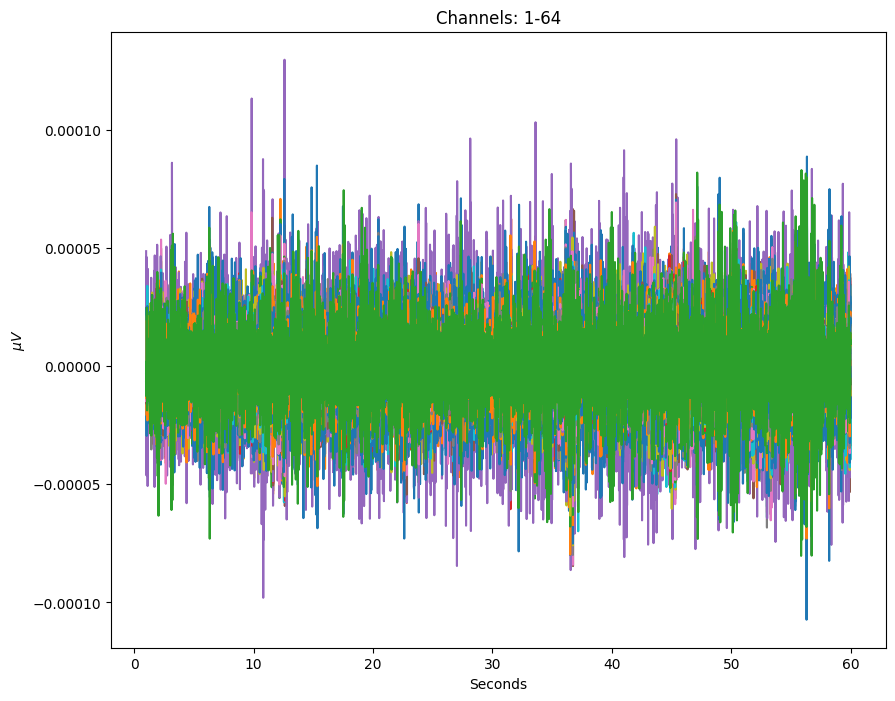

In [4]:
subject = 2  
runs = [3]

files = eegbci.load_data(subject, runs, './eeg-motor-movementimagery-dataset/files/')

#Read raw data files where each file contains a run
raws = [read_raw_edf(f, preload=True) for f in files]
#Combine all loaded runs
raw_obj = concatenate_raws(raws)
raw_data = raw_obj.get_data()

sfreq = raw_obj.info['sfreq']

raw_obj.filter(7., 30., fir_design='firwin', skip_by_annotation='edge')

data, times = raw_obj[:-1,int(sfreq * 1):int(sfreq * 60)]

fig = plt.subplots(figsize=(10,8))
plt.plot(times, data.T);
plt.xlabel('Seconds')
plt.ylabel('$\mu V$')
plt.title('Channels: 1-64');
raw_obj.ch_names

In [ ]:
events, event_ids = mne.events_from_annotations(raw_obj, event_id='auto')
event_ids

Used Annotations descriptions: ['T0', 'T1', 'T2']


{'T0': 1, 'T1': 2, 'T2': 3}

In [ ]:
events

array([[    0,     0,     1],
       [  672,     0,     3],
       [ 1328,     0,     1],
       [ 2000,     0,     2],
       [ 2656,     0,     1],
       [ 3328,     0,     2],
       [ 3984,     0,     1],
       [ 4656,     0,     3],
       [ 5312,     0,     1],
       [ 5984,     0,     3],
       [ 6640,     0,     1],
       [ 7312,     0,     2],
       [ 7968,     0,     1],
       [ 8640,     0,     2],
       [ 9296,     0,     1],
       [ 9968,     0,     3],
       [10624,     0,     1],
       [11296,     0,     2],
       [11952,     0,     1],
       [12624,     0,     3],
       [13280,     0,     1],
       [13952,     0,     3],
       [14608,     0,     1],
       [15280,     0,     2],
       [15936,     0,     1],
       [16608,     0,     2],
       [17264,     0,     1],
       [17936,     0,     3],
       [18592,     0,     1],
       [19264,     0,     2]])

In [16]:
subject = 1  
runs = [3]
files = eegbci.load_data(subject, runs, './eeg-motor-movementimagery-dataset/files/')
#Read raw data files where each file contains a run
raws = [read_raw_edf(f, preload=True) for f in files]
raw_obj.info
raw_obj = concatenate_raws(raws)
raw_data = raw_obj.get_data()
events, event_ids = mne.events_from_annotations(raw_obj, event_id='auto')

Extracting EDF parameters from d:\Dev\GitHub\tcc-brain\tcc-brain\dataset\eeg-motor-movementimagery-dataset\files\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R03.edf...
EDF file detected


Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']


In [23]:
el = 'F3'
channels = raw_obj.ch_names
channels = [x.replace('.','').upper() for x in channels]
print(channels.index(el))

31


In [18]:
events

array([[    0,     0,     1],
       [  672,     0,     3],
       [ 1328,     0,     1],
       [ 2000,     0,     2],
       [ 2656,     0,     1],
       [ 3328,     0,     2],
       [ 3984,     0,     1],
       [ 4656,     0,     3],
       [ 5312,     0,     1],
       [ 5984,     0,     3],
       [ 6640,     0,     1],
       [ 7312,     0,     2],
       [ 7968,     0,     1],
       [ 8640,     0,     2],
       [ 9296,     0,     1],
       [ 9968,     0,     3],
       [10624,     0,     1],
       [11296,     0,     2],
       [11952,     0,     1],
       [12624,     0,     3],
       [13280,     0,     1],
       [13952,     0,     3],
       [14608,     0,     1],
       [15280,     0,     2],
       [15936,     0,     1],
       [16608,     0,     2],
       [17264,     0,     1],
       [17936,     0,     3],
       [18592,     0,     1],
       [19264,     0,     2]])

In [26]:
raw_obj.ch_names

['Fc5.',
 'Fc3.',
 'Fc1.',
 'Fcz.',
 'Fc2.',
 'Fc4.',
 'Fc6.',
 'C5..',
 'C3..',
 'C1..',
 'Cz..',
 'C2..',
 'C4..',
 'C6..',
 'Cp5.',
 'Cp3.',
 'Cp1.',
 'Cpz.',
 'Cp2.',
 'Cp4.',
 'Cp6.',
 'Fp1.',
 'Fpz.',
 'Fp2.',
 'Af7.',
 'Af3.',
 'Afz.',
 'Af4.',
 'Af8.',
 'F7..',
 'F5..',
 'F3..',
 'F1..',
 'Fz..',
 'F2..',
 'F4..',
 'F6..',
 'F8..',
 'Ft7.',
 'Ft8.',
 'T7..',
 'T8..',
 'T9..',
 'T10.',
 'Tp7.',
 'Tp8.',
 'P7..',
 'P5..',
 'P3..',
 'P1..',
 'Pz..',
 'P2..',
 'P4..',
 'P6..',
 'P8..',
 'Po7.',
 'Po3.',
 'Poz.',
 'Po4.',
 'Po8.',
 'O1..',
 'Oz..',
 'O2..',
 'Iz..']

In [36]:
raw_data[1][672:1312]

array([-8.00e-06, -1.10e-05, -2.90e-05, -2.20e-05,  1.20e-05,  0.00e+00,
       -4.00e-06, -5.00e-06,  1.40e-05,  5.00e-06,  1.00e-05, -3.00e-06,
       -1.00e-05, -1.00e-06,  3.00e-06,  1.20e-05, -4.00e-06, -1.20e-05,
        1.00e-06, -2.00e-06,  2.00e-06, -2.00e-06, -7.00e-06, -1.50e-05,
       -3.20e-05, -2.50e-05, -5.70e-05, -9.10e-05, -8.20e-05, -7.30e-05,
       -7.20e-05, -4.20e-05,  1.00e-05, -4.50e-05, -4.60e-05, -5.00e-06,
       -4.10e-05, -5.20e-05, -4.10e-05, -3.80e-05, -4.10e-05, -7.40e-05,
       -7.50e-05, -1.05e-04, -1.16e-04, -9.30e-05, -1.03e-04, -8.30e-05,
       -9.00e-05, -1.18e-04, -1.08e-04, -9.00e-05, -9.10e-05, -8.60e-05,
       -6.70e-05, -5.90e-05, -6.30e-05, -5.00e-05, -1.80e-05,  2.90e-05,
        4.40e-05,  5.00e-05,  4.70e-05,  5.00e-06, -3.90e-05, -6.20e-05,
       -2.60e-05, -1.00e-05, -3.00e-05, -3.10e-05, -1.70e-05, -4.00e-06,
       -1.40e-05, -1.80e-05, -3.90e-05, -3.60e-05, -2.60e-05, -4.60e-05,
       -3.50e-05, -3.30e-05, -4.50e-05, -4.50e-05, 